Contorno 1: Perímetro = 6.43 cm, Área = 2.06 cm², Centroide = (1284, 885)
Contorno 2: Perímetro = 6.44 cm, Área = 2.06 cm², Centroide = (1215, 849)
Contorno 3: Perímetro = 14.52 cm, Área = 3.77 cm², Centroide = (960, 882)
Contorno 4: Perímetro = 11.60 cm, Área = 5.93 cm², Centroide = (407, 871)
Contorno 5: Perímetro = 8.88 cm, Área = 4.20 cm², Centroide = (140, 865)
Contorno 6: Perímetro = 10.66 cm, Área = 4.10 cm², Centroide = (708, 864)
Contorno 7: Perímetro = 14.84 cm, Área = 8.49 cm², Centroide = (1242, 670)
Contorno 8: Perímetro = 0.89 cm, Área = 0.03 cm², Centroide = (1283, 574)
Contorno 9: Perímetro = 0.87 cm, Área = 0.03 cm², Centroide = (1258, 574)
Contorno 10: Perímetro = 10.43 cm, Área = 2.87 cm², Centroide = (713, 648)
Contorno 11: Perímetro = 20.91 cm, Área = 4.52 cm², Centroide = (147, 635)
Contorno 12: Perímetro = 1.41 cm, Área = 0.07 cm², Centroide = (1271, 565)
Contorno 13: Perímetro = 11.36 cm, Área = 4.46 cm², Centroide = (975, 658)
Contorno 14: Perímetro = 21.43 cm,

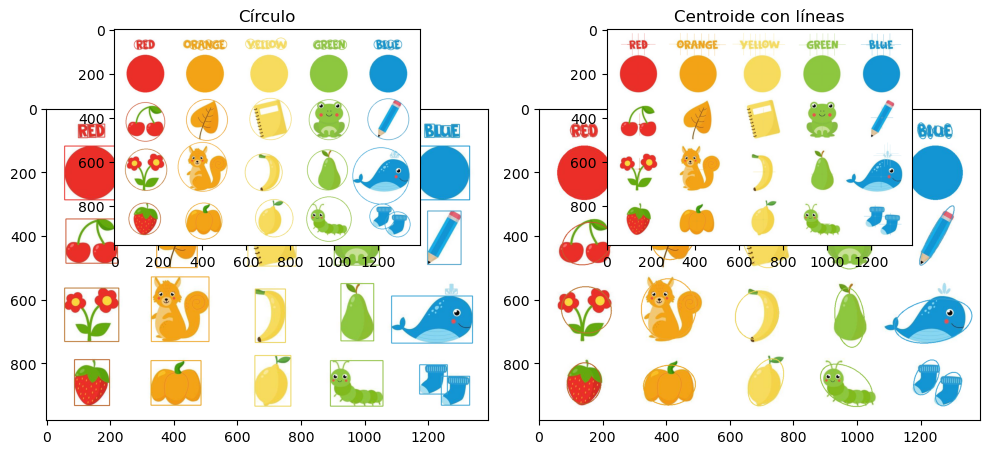

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('colores.jpg')
pixel = 50
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
ret, bin = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
contornos, jerarquia = cv2.findContours(bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img1 = imagen.copy()
img2 = imagen.copy()
img3 = imagen.copy()
img4 = imagen.copy()

perimetros = []
areas = []

for i, cnt in enumerate(contornos):
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    area = cv2.contourArea(cnt)
    perimetro = cv2.arcLength(cnt, True)
    areas.append(area)
    perimetros.append(perimetro)

    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, [cnt], -1, 255, -1)
    mean_val = cv2.mean(imagen, mask=mask)
    color = tuple(int(c) for c in mean_val[:3])

    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img1, (x, y), (x + w, y + h), color, 2)

    if len(cnt) >= 5:
        ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(img2, ellipse, color, 2)

    (x_circ, y_circ), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x_circ), int(y_circ))
    radius = int(radius)
    cv2.circle(img3, center, radius, color, 2)

    cv2.line(img4, (cx - 50, cy), (cx + 50, cy), color, 1)
    cv2.line(img4, (cx, cy - 50), (cx, cy + 50), color, 1)
    cv2.circle(img4, (cx, cy), 4, color, -1)

    perimetro_cm = perimetro / pixel
    area_cm2 = area / (pixel ** 2)
    print(f'Contorno {i+1}: Perímetro = {perimetro_cm:.2f} cm, Área = {area_cm2:.2f} cm², Centroide = ({cx}, {cy})')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Recuadro")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Elipse")

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title("Círculo")

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title("Centroide con líneas")

plt.tight_layout()
plt.show()

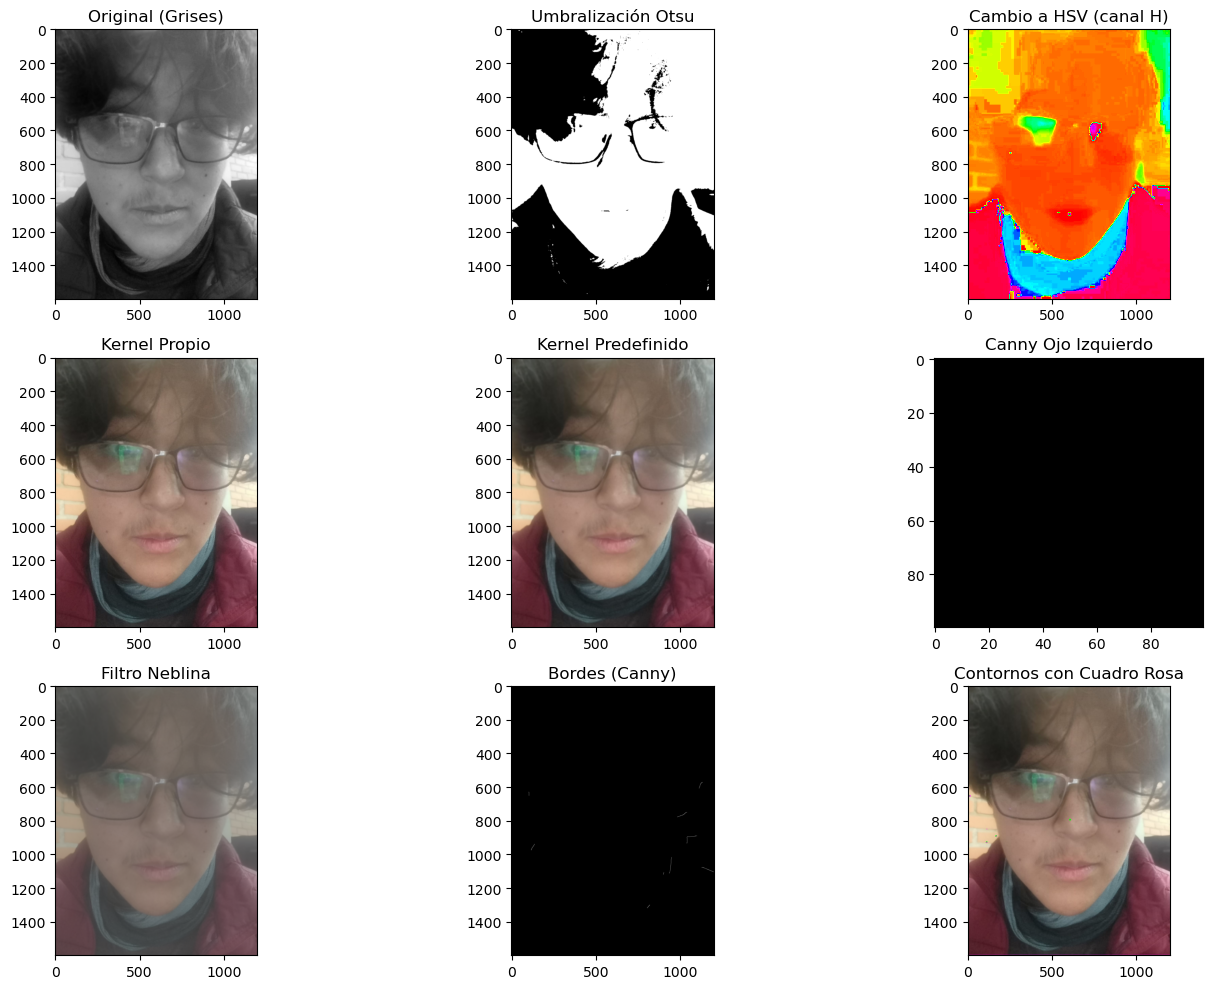

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

imagen_color = cv2.imread('photo.jpg')
imagen = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)

_, umbral = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

hsv = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2HSV)


kernel_personal = np.array([[0, -1, 0],
                            [-1, 5,-1],
                            [0, -1, 0]])
imagen_kernel_prop = cv2.filter2D(imagen_color, -1, kernel_personal)

imagen_kernel_predef = cv2.GaussianBlur(imagen_color, (7, 7), 0)

ojo_izq = imagen[300:400, 450:550]
ojo_canny = cv2.Canny(ojo_izq, 100, 200)

alpha = 0.5
neblina = cv2.convertScaleAbs(imagen_color, alpha=alpha, beta=50)

bordes = cv2.Canny(imagen, 100, 200)

ret, binaria = cv2.threshold(imagen, 200, 255, cv2.THRESH_BINARY_INV)
contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contornos:
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0
    area = cv2.contourArea(cnt)
    perimetro = cv2.arcLength(cnt, True)
    cv2.circle(imagen_color, (cx, cy), 5, (0, 255, 0), -1)
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(imagen_color, (x, y), (x + w, y + h), (255, 0, 255), 2) 

plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
plt.title("Original (Grises)")
plt.imshow(imagen, cmap='gray')

plt.subplot(3, 3, 2)
plt.title("Umbralización Otsu")
plt.imshow(umbral, cmap='gray')

plt.subplot(3, 3, 3)
plt.title("Cambio a HSV (canal H)")
plt.imshow(hsv[:, :, 0], cmap='hsv')

plt.subplot(3, 3, 4)
plt.title("Kernel Propio")
plt.imshow(cv2.cvtColor(imagen_kernel_prop, cv2.COLOR_BGR2RGB))

plt.subplot(3, 3, 5)
plt.title("Kernel Predefinido")
plt.imshow(cv2.cvtColor(imagen_kernel_predef, cv2.COLOR_BGR2RGB))

plt.subplot(3, 3, 6)
plt.title("Canny Ojo Izquierdo")
plt.imshow(ojo_canny, cmap='gray')

plt.subplot(3, 3, 7)
plt.title("Filtro Neblina")
plt.imshow(cv2.cvtColor(neblina, cv2.COLOR_BGR2RGB))

plt.subplot(3, 3, 8)
plt.title("Bordes (Canny)")
plt.imshow(bordes, cmap='gray')

plt.subplot(3, 3, 9)
plt.title("Contornos con Cuadro Rosa")
plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

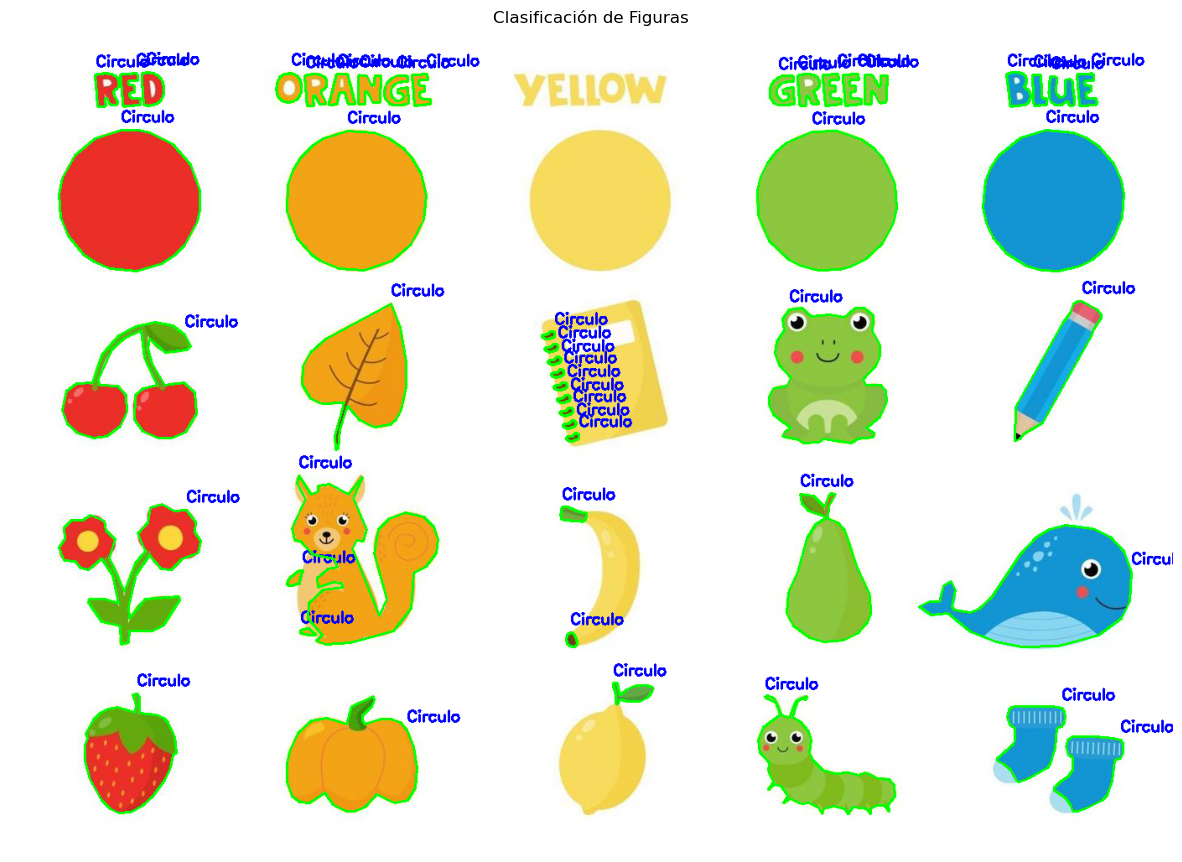

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('colores.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
bin = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)[1]
contornos = cv2.findContours(bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

for cnt in contornos:
    epsilon = 0.003 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    momentos = cv2.moments(cnt)
    huMomentos = cv2.HuMoments(momentos)
    forma = "Indefinido"
    vertices = len(approx)
    if vertices == 3:
        forma = "Triangulo"
    elif vertices == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w)/h
        forma = "Cuadrado" if 0.95 <= aspect_ratio <= 1.05 else "Rectangulo"
    elif vertices > 5:
        forma = "Circulo"
    cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)
    x, y = approx.ravel()[0], approx.ravel()[1]
    cv2.putText(img, forma, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Clasificación de Figuras")
plt.show()